In [11]:
%matplotlib inline

from matplotlib import pyplot as plt
from collections import defaultdict
import json
import numpy as np
import pandas as pd
import re
import sys
import seaborn as sb
from analyze_experiment_in_progress import get_data_from_logs
sb.set()

In [24]:
#bert4rec outperforms everything
#experiment_logs = './results/bert4rec_config_2021_11_04T17_15_31/stdout'

#SALREC-BCE-Great
#experiment_logs = './results/bert4rec_config_2021_11_07T22_26_10/stdout'


#SALREC-Lambdarank 0.157107
#experiment_logs = './results/ml_benchmark20m_2021_11_18T16_38_37/stdout'



#Transformer-Lambdarank 0.1603
#experiment_logs = './results/ml_benchmark20m_2021_11_19T17_43_30/stdout'

#experiment_logs = './results/ml_benchmark20m_2021_11_23T14_39_04/stdout'

#experiment_logs = './results/ml_benchmark20m_2021_11_25T09_41_35/stdout'

#Fast Lambdarank on dekstop
#experiment_logs = './results/ml_benchmark20m_2021_11_27T23_55_22/stdout'


#Fast Lambdarank on dekstop - 40k, bce slightly better
#experiment_logs = './results/ml_benchmark20m_2021_11_28T08_36_11/stdout'


# Learning rate effects:

# Lambdarank
#experiment_logs = "./results/ml_benchmark20m_2021_11_26T10_36_55/stdout"
#BCE
#experiment_logs = "./results/ml_benchmark20m_2021_11_27T11_36_03/stdout"



#Truncation effects: 
#1-20
#experiment_logs = "./results/ml_benchmark20m_2021_11_28T18_14_50/stdout"

#30-120
#experiment_logs = "./results/ml_benchmark20m_2021_11_29T15_12_00/stdout"


#stream -first run: 
#experiment_logs = "./results/steam_benchmark_2021_12_02T16_41_29/stdout"

#steam - num targets
#experiment_logs = "./results/steam_benchmark_2021_12_04T12_47_09/stdout"


#lambda norm effect:
#experiment_logs = "results/ml_benchmark20m_2021_12_02T10_46_35/stdout"

#truncated lambdarank with bce
#experiment_logs = "./results/ml_benchmark20m_2021_12_05T21_30_29/stdout"


#lambdarank-truncated fixed

#experiment_logs = "./results/ml_benchmark20m_2021_12_07T20_37_41/stdout"



#lambdarank-truncated-bce-focus
#experiment_logs = "./results/ml_benchmark20m_2021_12_08T07_39_20/stdout"

#important test
#experiment_logs = "./results/ml_benchmark20m_2021_12_09T09_28_21/stdout"


#12 hours experiment with truncated lambdarank
#experiment_logs = "./results/ml_benchmark20m_2021_12_12T20_24_03/stdout"



#lambda normalization 
#experiment_logs = "./results/lambda_normalization_experiment_2021_12_14T17_33_27/stdout"


#gru4rec experiment
#experiment_logs = "./results/ml_benchmark1m_2021_12_15T18_36_26/stdout"

#sasrec-booking
experiment_logs = "results/booking_benchmark_2021_12_23T21_31_04/stdout"

In [25]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [26]:
data = get_data_from_logs(experiment_logs, 0)

In [27]:
df = pd.DataFrame(data).set_index('model_name')

df.sort_values(df.columns[0])

,HIT@1,HIT@5,HIT@10,ndcg@5,ndcg@10,MRR,sampled_metrics,model_build_time,model_inference_time,model_metadata,num_epochs,metrics_history
model_name,,,,,,,,,,,,
top_recommender,0.018912,0.057833,0.094314,0.037922,0.049981,0.047425,"{'HIT@1': 0.025134211810639337, 'HIT@5': 0.0956564177647633, 'HIT@10': 0.17069302098584677, 'ndcg@5': 0.05957288245186319, 'ndcg@10': 0.08341232612786365, 'MRR': 0.0805603126418383}",0.018341,6.529062,{},0,[]
SASRec-BCE,0.254148,0.496950,0.590410,0.382862,0.413211,0.367690,"{'HIT@1': 0.493411420204978, 'HIT@5': 0.8034407027818448, 'HIT@10': 0.8814055636896047, 'ndcg@5': 0.6623896491044212, 'ndcg@10': 0.6877735763976239, 'MRR': 0.6312623544143889}",3622.538067,331.081255,"{'epochs_trained': 19, 'best_val_ndcg': 0.44297677278518677, 'val_ndcg_history': [[37.370776653289795, 0.07053330540657043], [73.61836338043213, 0.07308954000473022], [109.77657222747803, 0.14517110586166382], [145.88988375663757, 0.32370221614837646],...",100,"[{'loss': 0.0093, 'ndcg_at_40': 0.0643, 'val_loss': 0.00048006, 'val_ndcg_at_40': 0.0705, 'epoch': 1, 'val_ndcg': 0.07053, 'best_ndcg': 0.07053, 'steps_since_improved': 0.0, 'total_training_time': 37.370776653289795}, {'loss': 0.00063731, 'ndcg_at_40':..."
SASRec-Lambdarank-Truncated:2500-bce-weight:0.975,0.260615,0.497926,0.591020,0.385509,0.415750,0.370463,"{'HIT@1': 0.5201317715959004, 'HIT@5': 0.8001464128843339, 'HIT@10': 0.862371888726208, 'ndcg@5': 0.6738356519074405, 'ndcg@10': 0.6940262352315959, 'MRR': 0.6447575739708654}",3607.458128,333.500125,"{'epochs_trained': 52, 'best_val_ndcg': 0.45677676796913147, 'val_ndcg_history': [[48.28462028503418, 0.3740328252315521], [95.80703210830688, 0.40545234084129333], [143.63087344169617, 0.4251091778278351], [191.47937774658203, 0.42769771814346313], [2...",75,"[{'loss': 7.5337, 'ndcg_at_40': 0.248, 'val_loss': 9.088, 'val_ndcg_at_40': 0.374, 'epoch': 1, 'val_ndcg': 0.37403, 'best_ndcg': 0.37403, 'steps_since_improved': 0.0, 'total_training_time': 48.28462028503418}, {'loss': 10.0807, 'ndcg_at_40': 0.3421, 'v..."
SASRec-Lambdarank-Truncated:2500,0.265007,0.505612,0.598097,0.391975,0.421881,0.375562,"{'HIT@1': 0.5132991703269888, 'HIT@5': 0.7930697901415324, 'HIT@10': 0.8502928257686676, 'ndcg@5': 0.6670168781363749, 'ndcg@10': 0.685744915542299, 'MRR': 0.637589733575512}",3641.775609,332.105994,"{'epochs_trained': 55, 'best_val_ndcg': 0.45696988701820374, 'val_ndcg_history': [[46.52769637107849, 0.3859190344810486], [91.96051120758057, 0.4075443148612976], [137.3342480659485, 0.41543230414390564], [182.66430735588074, 0.42510661482810974], [22...",80,"[{'loss': 1.9695, 'ndcg_at_40': 0.2686, 'val_loss': 1.7069, 'val_ndcg_at_40': 0.3859, 'epoch': 1, 'val_ndcg': 0.38592, 'best_ndcg': 0.38592, 'steps_since_improved': 0.0, 'total_training_time': 46.52769637107849}, {'loss': 1.8712, 'ndcg_at_40': 0.3421, ..."
SASRec-lastonly-BCE,0.278795,0.505735,0.594924,0.399228,0.428227,0.385129,"{'HIT@1': 0.5069546120058566, 'HIT@5': 0.7930697901415324, 'HIT@10': 0.8570034163006345, 'ndcg@5': 0.6628202569100466, 'ndcg@10': 0.6837201964993153, 'MRR': 0.6334610002071942}",3612.993065,331.280436,"{'epochs_trained': 9, 'best_val_ndcg': 0.4532887041568756, 'val_ndcg_history': [[36.71388649940491, 0.06849493086338043], [72.26132011413574, 0.0751059353351593], [108.28568434715271, 0.07866095751523972], [143.8753538131714, 0.2724766731262207], [179....",100,"[{'loss': 0.0089, 'ndcg_at_40': 0.0564, 'val_loss': 0.00043458, 'val_ndcg_at_40': 0.0685, 'epoch': 1, 'val_ndcg': 0.06849, 'best_ndcg': 0.06849, 'steps_since_improved': 0.0, 'total_training_time': 36.71388649940491}, {'loss': 0.00025813, 'ndcg_at_40': ..."
svd_recommender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,[]


0 dict_keys([0])
1 dict_keys([0, 1])


<Figure size 1152x648 with 0 Axes>

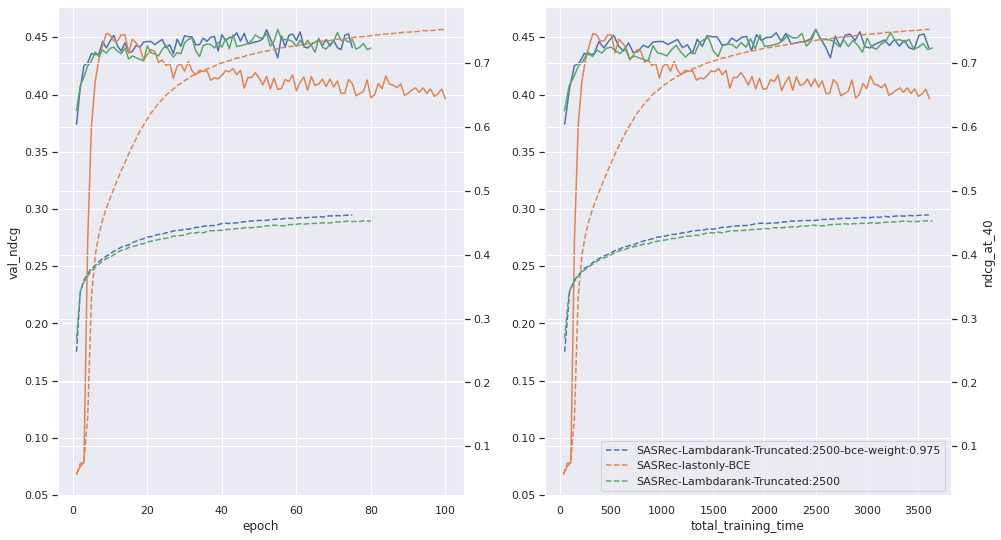

In [30]:
moving_average_steps=1
max_points = 100000


def get_metric(metric_history, metric_name):
    result = []
    for item in metric_history:
        try:
            result.append(item[metric_name])
        except:
            print(item)
    return result

plt.figure(figsize=(16, 9))

axises = ['epoch', 'total_training_time']

fig, ax = plt.subplots(1, len(axises))
fig.set_figheight(9)
fig.set_figwidth(16)

interesting_models = ['SASRec-lastonly-BCE', 'SASRec-Lambdarank-Truncated:2500-bce-weight:0.975', 'SASRec-Lambdarank-Truncated:2500']
second_metrics = {}

for recommender in data:
    if recommender['model_name'] not in interesting_models:
        continue
    if len(recommender['metrics_history']) > 0:
        history = recommender['metrics_history']
        metric_name = 'val_ndcg'
        second_metric_name = 'ndcg_at_40'
        metric = moving_average(get_metric(history, metric_name), moving_average_steps)[:max_points]
        if second_metric_name != None:
            second_metric = moving_average(get_metric(history, second_metric_name), moving_average_steps)[:max_points]
        #success = get_metric(history, 'Success_at_4')
        #val_success = moving_average(get_metric(history, 'val_Success_at_4'), 5)
        
        #plt.plot(val_success, label=recommender['model_name'] + "val_sps")
        #plt.plot(success, label=recommender['model_name'] + "sps")
        for axis_num in range(len(axises)):
            axis_name = axises[axis_num]
            axis = get_metric(history, axis_name)[moving_average_steps - 1:][:max_points]
            ax[axis_num].plot(axis, metric,label=recommender['model_name'])
            
            ax[axis_num].set_xlabel(axis_name)
            if axis_num == 0:
                ax[axis_num].set_ylabel(metric_name)
            
            if (second_metric_name != None):
                if axis_num not in second_metrics:
                    second_metrics[axis_num] = ax[axis_num].twinx()
                    print(axis_num, second_metrics.keys())
                ax2 = second_metrics[axis_num]
                if axis_num == 1:
                    ax2.set_ylabel(second_metric_name)
                ax2.plot(axis, second_metric, '--', label=recommender['model_name'],)

            
        #plt.plot(ndcg, label=recommender['model_name'] + "ndcg")
        #plt.plot(val_success, label=recommender['model_name'] + "_val_sps")
plt.legend()


### len(metric), len(metric) - np.argmax(metric) - 1

In [16]:
max(metric)

0.07319922000169754